## <center> Consistent Bayesian Inference with Push-Forward Measures: Theoretical Developments
___
    
<center> 
<font color='blue'>**Troy Butler**, University of Colorado, Denver, USA, troy.butler@ucdenver.edu</font>


<center>*Timothy Wildey*, Sandia National Laboratories, USA, tmwilde@sandia.gov


<center>*John D. Jakeman*, Sandia National Laboratories, USA, jdjakem@sandia.gov

___

<center>References:

_[***Combining Push-Forward Measures and Bayes' Rule to Construct Consistent Solutions to Stochastic Inverse Problems
***, T. Butler, J. Jakeman, T. Wildey, SIAM J. Sci. Comput., 40(2), A984–A1011](https://epubs.siam.org/doi/abs/10.1137/16M1087229)_

_[***Convergence of Probability Densities using Approximate Models for Forward and Inverse Problems in Uncertainty Quantification***, T. Butler, J. Jakeman, T. Wildey, arXiv:1807.00375](https://arxiv.org/abs/1807.00375)_

___
<center>Tutorial and these slides available at: https://github.com/eecsu/SIAM-AN18-Tutorial

### <center> Outline
___
    

* [An overview](#Intuition)

    * The big picture, some intuition/theory, and a simple example in Python to illustrate some key points.
<br>
<br>

* [Recent Theoretical Advancements](#Advances)

    * Proving convergence of densities using approximate models.
<br>
<br>

* [Some advanced numerical results](#Numerics) ***If time permits***

    * Sparse grids and discretized PDEs.
<br>
<br>
    
* [Conclusions and On-going/Future Work](#Conclusions)

<a id='Intuition'></a>
### <center> Building Intuition
___
    
Most of the material in this part of the talk is found in _[***Combining Push-Forward Measures and Bayes' Rule to Construct Consistent Solutions to Stochastic Inverse Problems
***, T. Butler, J. Jakeman, T. Wildey, SIAM J. Sci. Comput., 40(2), A984–A1011](https://epubs.siam.org/doi/abs/10.1137/16M1087229)_

#### Defining the input/output spaces and the mapping between them

 * $\lambda\in\Lambda$ denotes inputs to some model referred to as <font color='blue'>model parameters.</font>
 
 
 * $Q(\lambda)$ denotes measurable (scalar) outputs of the model referred to as <font color='blue'>quantities of interest (QoI).</font>
 
 
 * $\mathcal{D} = Q(\Lambda)$ denotes the set of observable data that can be <font color='red'>predicted by the model</font>.
     * $q$ is used to denote a single datum.

### <center> Building Intuition
___
    
<center><img src="figures/inf_pred_cartoon.png" width=70%>

### <center> A statistical Bayesian perspective
___

$$
    \tilde{\pi}_\Lambda^{post}(\lambda \, | \, q) = \pi_\Lambda^{prior}\frac{ L(q\, |\,  \lambda) }{C}
$$

 * $\pi_\Lambda^{prior}$ is a prior.


 * $L(q\, | \, \lambda)$ is a ***data likelihood*** function that is not necessarily the same as the observed density.


 * $C$ is a normalizing constant.
 
     * Usually not important when generating samples from the posterior. 
     
     * We compute it to compare to our posterior.
 

### <center> A different perspective
___
Given a probability measure on $\mathcal{D}$ describing uncertainty in observed data, determine a probability measure $P_\Lambda$ on $\Lambda$ that is <font color='purple'>***consistent***</font> with both the model and observed data. 

   
Consistency means the ***<font color='blue'>push-forward measure*** of $P_\Lambda$ through the QoI map $Q(\lambda)$ matches the probability measure given on $\mathcal{D}$. 

In other words, we want $P_\Lambda$ to be a ***<font color='blue'>pullback measure.</font>***

To construct the pullback density, we utilize the ***<font color='blue'>push-forward of the prior</font>***:

 
 * $\pi_{\mathcal{D}}^{Q(prior)}$ is the push-forward of the prior density.
 
     * Represents a prior ***prediction*** of the relative likelihood of model outputs.

### <center> A different (consistent) type of posterior
___
$$
  \large \pi_\Lambda^{post}(\lambda) = \pi_\Lambda^{prior}(\lambda) \frac{\pi_{\mathcal{D}}^{obs}(Q(\lambda))}{\pi_{\mathcal{D}}^{Q(prior)}(Q(\lambda))} 
$$


* Solving a ***<font color='blue'>forward UQ problem</font>*** to approximate $\pi_{\mathcal{D}}^{Q(prior)}$ provides the ***<font color='blue'>necessary and sufficient</font>*** information required to ***<font color='blue'>uniquely define</font>*** $\pi_\Lambda^{post}$.


 * **<font color='purple'>Predictability Assumption</font>**: $\exists$ $C>0$ such that $\pi_{\mathcal{D}}^{obs}(q) \leq C\pi_{\mathcal{D}}^{Q(prior)}(q)$ for a.e. $q\in\mathcal{D}$.

* $\pi_\Lambda^{post}$ is ***<font color='blue'>stable</font>*** (in the TV-metric) w.r.t. perturbations in $\pi_\Lambda^{prior}$ and $\pi_{\mathcal{D}}^{obs}$.

* The error in the approximate $\pi_\Lambda^{post}$ is bounded by the error in the approximate $\pi_{\mathcal{D}}^{Q(prior)}$ , i.e., the approximations are ***<font color='blue'>numerically stable.</font>*** 

### <center> A simple example in Python: The Libraries
___

 * `numpy` to handle sample sets
 
    * `random` subpackage to generate random samples of various distributions.

 * `scipy.stats`

    * A standard kernel density estimator to approximate densities on sample sets.

    * Evaluate some standard density functions (e.g., normal) on sample sets.

 * `matplotlib.pyplot` to visualize results.

In [1]:
# The libraries we will use
import numpy as np
from scipy.stats import norm # The standard Normal distribution
from scipy.stats import gaussian_kde as GKDE # A standard kernel density estimator
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

### <center> A simple example in Python: The Spaces and QoI
___


* $\Lambda=[-1,1]$ (this is dealt with implicitly later).


* $Q(\lambda) = \lambda^p$ for $p=1$ or $5$.
     * $\mathcal{D} = Q(\Lambda) = [-1,1]$ (we will explore the impacts of this later).

In [3]:
def QoI(lam,p): # defing a QoI mapping function
    q = lam**p
    return q

### <center> A simple example in Python: The Densities
___


* $\pi_{\Lambda}^{prior} \sim U([-1,1])$

* $\pi_{\mathcal{D}}^{obs} \sim N(0.25,0.1^2)$
 
* $\pi_{\mathcal{D}}^{Q(prior)}$ is approximated for each QoI map using `N` samples and the Gaussian Kernel Density Estimator (`GKDE`) imported from `scipy.stats`.

In [4]:
# Approximate the pushforward of the prior
N = int(1E4) # number of samples from prior
lam = np.random.uniform(low=-1,high=1,size=N) # sample set of the prior

# Evaluate the two different QoI maps on this prior sample set
qvals_linear = QoI(lam,1) # Evaluate lam^1 samples
qvals_nonlinear = QoI(lam,5) # Evaluate lam^5 samples
 
# Estimate push-forward densities for each QoI
q_linear_kde = GKDE( qvals_linear ) 
q_nonlinear_kde = GKDE( qvals_nonlinear )

### <center> A simple example in Python: Sampling $\pi_\Lambda^{post}$
___

**<font color='purple'>Goal:</font>** Re-use samples generating $\pi_{\mathcal{D}}^{Q(prior)}$ to generate samples from $\pi_\Lambda^{post}$. 

#### Investigate  [rejection sampling](https://en.wikipedia.org/wiki/Rejection_sampling):
___
**<font color='purple'>Goal:</font>** Use samples from a random variable with density $g$ to generate samples from a random variable with density $f$. 


**<font color='purple'>Requirement:</font>** There exists $M>0$ such that $f(x)\leq M g(x)$ for all $x$. 

**<font color='purple'>Algorithm:</font>**
For proposed sample $y$ from $g$ 
* Generate sample $u \sim \mathrm {Unif} (0,1)$.
* If $u<f(y)/Mg(y)$, <font color='blue'>accept</font> $y$ as sample from $f$, otherwise reject.

### <center> A simple example in Python: Sampling $\pi_\Lambda^{post}$
___
**<font color='purple'>Rejection sampling for $\pi_\Lambda^{post}$?</font>**
    
$g=\pi_\Lambda^{prior}$ and $f=\pi_\Lambda^{post}$, so can use rejection sampling if there exists $M>0$ s.t.
$$
    \pi_\Lambda^{prior}(\lambda) \frac{\pi_{\mathcal{D}}^{obs}(Q(\lambda))}{\pi_{\mathcal{D}}^{Q(prior)}(Q(\lambda))} \leq M \pi_\Lambda^{prior}(\lambda).
$$

**<font color='purple'>Some manipulations and an observation</font>**

Divide through by the $\pi_\Lambda^{prior}$ and multiply by $\pi_{\mathcal{D}}^{Q(prior)}$ to both sides to see
$$
    \pi_{\mathcal{D}}^{obs}(Q(\lambda)) \leq M \pi_{\mathcal{D}}^{Q(prior)}.
$$

***<font color='purple'>The predictability assumption guarantees the existence of $M>0$.</font>***

### <center> A simple example in Python: Something useful
___
    
$$
    \text{We rewrite } \pi_\Lambda^{post}(\lambda) = \pi_\Lambda^{prior}(\lambda)r(Q(\lambda)), \text{ where } r(Q(\lambda)) := \frac{\pi_{\mathcal{D}}^{obs}(Q(\lambda))}{\pi_{\mathcal{D}}^{Q(prior)}(Q(\lambda))}.
$$

* $r(Q(\lambda))$ defines a re-weighting of the prior and its samples.

* Can estimate $M>0$ by maximum of $r(Q(\lambda))$ on the prior sample set.

* Rejection sampling done by comparing $r(Q(\lambda))/M$ evaluated on prior sample set to uniform random variables.

In [5]:
def rejection_sampling(r):
    N = r.size # size of proposal sample set
    check = np.random.uniform(low=0,high=1,size=N) # create random uniform weights to check r against
    M = np.max(r)
    new_r = r/M # normalize weights 
    idx = np.where(new_r>=check)[0] # rejection criterion
    return idx

### <center> A simple example in Python: Sampling time!
___

We now compute $r(Q(\lambda))$ and perform rejection sampling.

In [6]:
# Evaluate the observed density on the QoI sample set and then compute r
obs_vals_linear = norm.pdf(qvals_linear, loc=0.25, scale=0.1)
obs_vals_nonlinear = norm.pdf(qvals_nonlinear, loc=0.25, scale=0.1)

r_linear = np.divide(obs_vals_linear,q_linear_kde(qvals_linear))
r_nonlinear = np.divide(obs_vals_nonlinear,q_nonlinear_kde(qvals_nonlinear))

In [7]:
# Use rejection sampling for the CBayes posterior
samples_to_keep_linear = rejection_sampling(r_linear)
post_q_linear = qvals_linear[samples_to_keep_linear]
post_lam_linear = lam[samples_to_keep_linear]

samples_to_keep_nonlinear = rejection_sampling(r_nonlinear)
post_q_nonlinear = qvals_nonlinear[samples_to_keep_nonlinear]
post_lam_nonlinear = lam[samples_to_keep_nonlinear]

### <center> A simple example in Python: Comparison to statistical Bayesian
___

Below, we consider the same prior and QoI maps as before, and we make the data likelihood function match the observed density.

In [8]:
# compute normalizing constants
C_linear = np.mean(obs_vals_linear) 
C_nonlinear = np.mean(obs_vals_nonlinear)

sbayes_r_linear = obs_vals_linear/C_linear
sbayes_r_nonlinear = obs_vals_nonlinear/C_nonlinear

sbayes_samples_to_keep_linear = rejection_sampling(sbayes_r_linear)
sbayes_post_q_linear = qvals_linear[sbayes_samples_to_keep_linear]
sbayes_post_lam_linear = lam[sbayes_samples_to_keep_linear]

sbayes_samples_to_keep_nonlinear = rejection_sampling(sbayes_r_nonlinear)
sbayes_post_q_nonlinear = qvals_nonlinear[sbayes_samples_to_keep_nonlinear]
sbayes_post_lam_nonlinear = lam[sbayes_samples_to_keep_nonlinear]

<IPython.core.display.Javascript object>


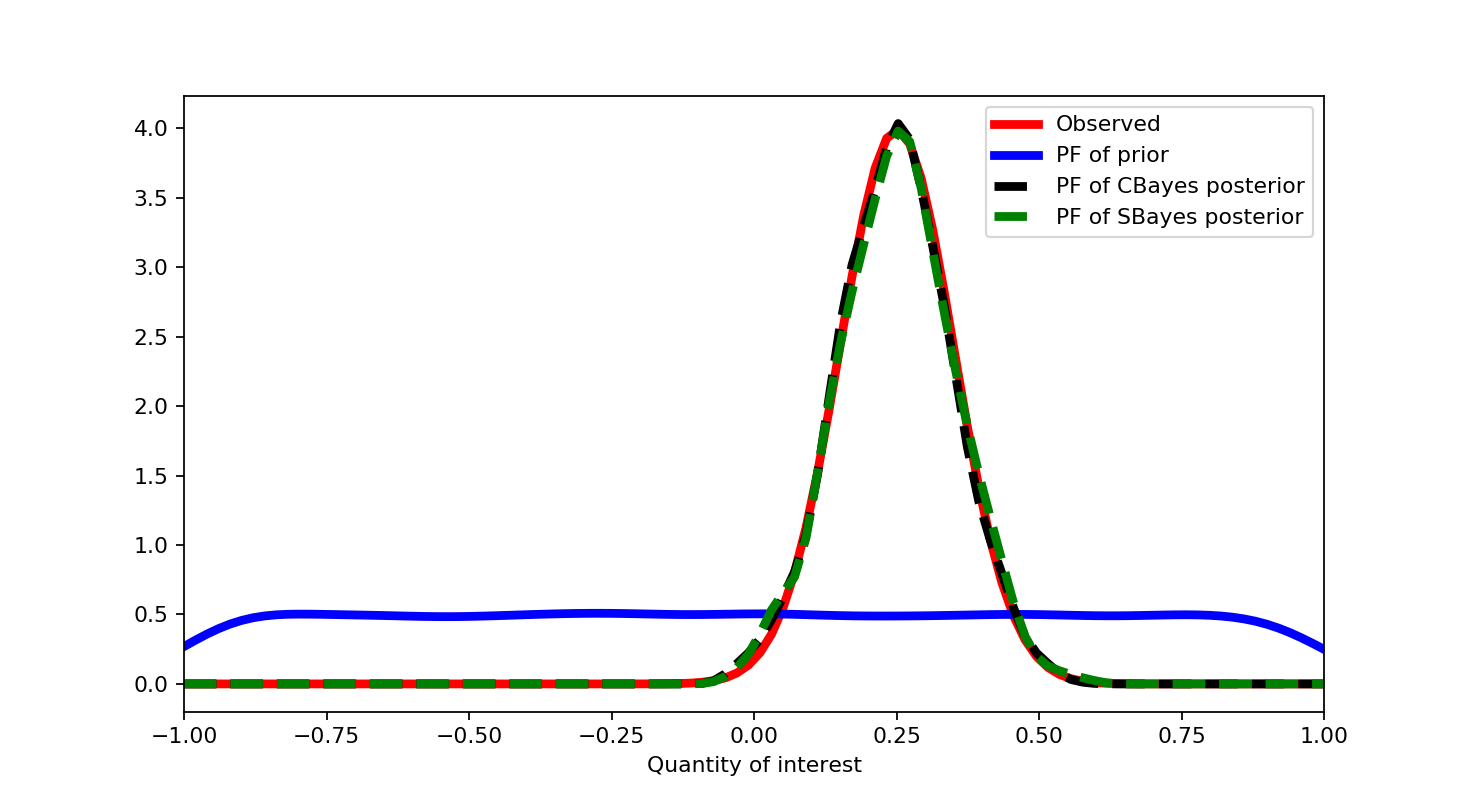

((-1, 1),
 Text(0.5,0,'Quantity of interest'),
 None)

In [9]:
# Compare the observed and the pushforwards of prior, Cbayes posterior and Sbayes posterior
plt.figure()
qplot = np.linspace(-1,1, num=100)
obs_vals_plot = norm.pdf(qplot, loc=0.25, scale=0.1)

postq_lin_kde = GKDE( post_q_linear )
sb_postq_lin_kde = GKDE( sbayes_post_q_linear )

oplot = plt.plot(qplot,obs_vals_plot, 'r-', linewidth=4, label="Observed")
prplot = plt.plot(qplot,q_linear_kde(qplot),'b-', linewidth=4, label="PF of prior")
poplot = plt.plot(qplot,postq_lin_kde(qplot),'k--', linewidth=4, label="PF of CBayes posterior")
sb_poplot = plt.plot(qplot,sb_postq_lin_kde(qplot),'g--', linewidth=4, label="PF of SBayes posterior")

plt.xlim([-1,1]), plt.xlabel("Quantity of interest"), plt.legend(), plt.show()

<IPython.core.display.Javascript object>


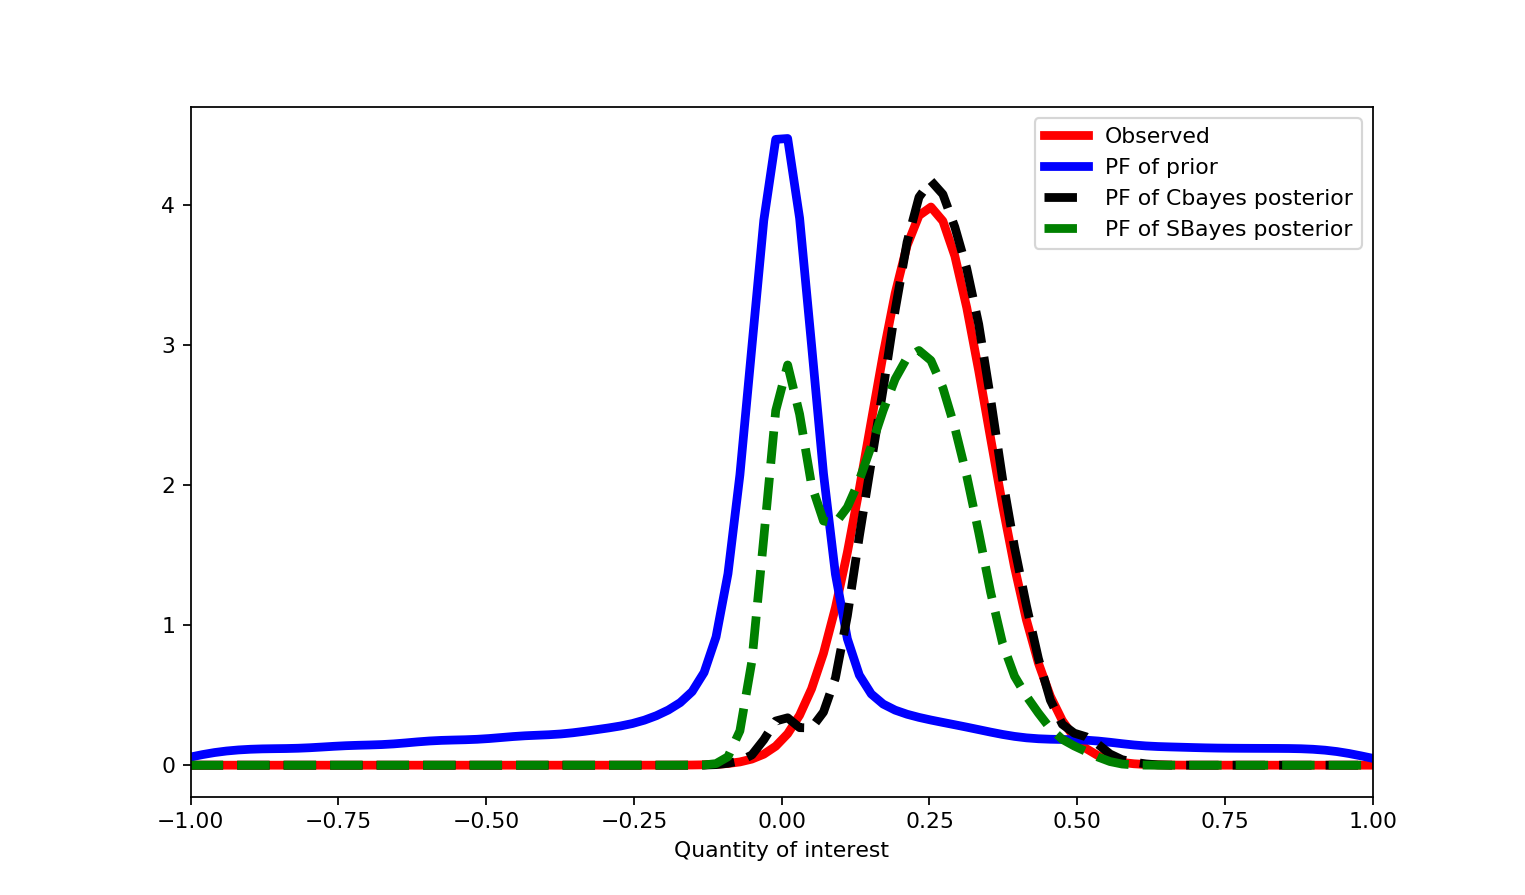

((-1, 1),
 Text(0.5,0,'Quantity of interest'),
 None)

In [10]:
# Compare the observed and the pushforwards of prior, Cbayes posterior and Sbayes posterior
plt.figure()
qplot = np.linspace(-1,1, num=100)
obs_vals_plot = norm.pdf(qplot, loc=0.25, scale=0.1)

postq_nl_kde = GKDE( post_q_nonlinear )
sb_postq_nl_kde = GKDE( sbayes_post_q_nonlinear )

oplot = plt.plot(qplot,obs_vals_plot, 'r-', linewidth=4, label="Observed")
prplot = plt.plot(qplot,q_nonlinear_kde(qplot),'b-', linewidth=4, label="PF of prior")
poplot = plt.plot(qplot,postq_nl_kde(qplot),'k--', linewidth=4, label="PF of Cbayes posterior")
sb_poplot = plt.plot(qplot,sb_postq_nl_kde(qplot),'g--', linewidth=4, label="PF of SBayes posterior")

plt.xlim([-1,1]), plt.xlabel("Quantity of interest"), plt.legend(), plt.show()

### <center> A simple example in Python: Evaluating the solution
___
    
#### Quality of solution? 

* Statistics on posterior easily estimated using the accepted sample set, but it is ***<font color='red'>unusual to know what the mean or standard deviation of the posterior should be</font>.***

* ***<font color='purple'>We do know what the statistics should be on the push-forward of $\pi_\Lambda^{post}$.</font>***
    * Check by computing statistics of the `post_q_*` samples.    

    
* Statistics only tell part of the story, and we should in general check at least two things:

 1. Did we satisfy the predictability assumption?
 
 2. What did we gain by solving the inverse problem?

### <center> A simple example in Python: Developing a diagnostic
___
#### 1. Did we satisfy the predictability assumption?

Predictability assumption satisfied implies $I(\pi_\Lambda^{post})=1$ where, 

$$
    I(\pi_\Lambda^{post}) = \int_\Lambda \pi_\Lambda^{post}(\lambda)\, d\mu_\Lambda.
$$

Direct substitution yields
$$
    I(\pi_\Lambda^{post}) = \int_\Lambda \pi_\Lambda^{prior}(\lambda)r(Q(\lambda))\, d\mu_\Lambda = \int_\Lambda r(Q(\lambda))\, dP_\Lambda^{prior} = \mathbb{E}(r(Q(\lambda))).
$$

___
**<font color='purple'>Diagnostic for Numerically Verifying Predictability Assumption Satisfied:</font>**

***Sample mean of $r(Q(\lambda))$ is approximately 1.***
___

### <center> A simple example in Python: Information gain
___

#### 2. What did we gain by solving the inverse problem?

***<font color='blue'>Information gain</font>*** quantified by the [Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) (KL divergence)
\begin{eqnarray*}
    KL(\pi_{\Lambda}^{post} \, : \, \pi_{\Lambda}^{prior}) &=& \int_\Lambda \pi_\Lambda^{post}(\lambda)\log\left(\frac{\pi_\Lambda^{post}(\lambda)}{\pi_\Lambda^{prior}(\lambda)}\right)\, d\mu_\Lambda \\ &=& \int_\Lambda r(Q(\lambda))\log r(Q(\lambda))\, dP_\Lambda^{prior}.
\end{eqnarray*}

**<font color='purple'> Understanding the KL divergence:</font>**
$KL(\pi_{\Lambda}^{post} \, : \, \pi_{\Lambda}^{prior}) \geq 0$.
* Larger values indicate the posterior differs more significantly from the prior. 
        
* Different priors or different QoI maps clearly can impact the KL divergence.

### <center> A simple example in Python: Some further investigation
___

Let's compute some statistics, diagnostics and information gained.

In [11]:
print(np.mean(post_q_linear))
print(np.sqrt(np.var(post_q_linear)))
print(np.mean(r_linear))
print(np.mean(r_linear*np.log(r_linear)))

0.24706510844986876
0.09971386476569545
0.9942493380223867
1.5802938961428412


In [12]:
print(np.mean(post_q_nonlinear))
print(np.sqrt(np.var(post_q_nonlinear)))
print(np.mean(r_nonlinear))
print(np.mean(r_nonlinear*np.log(r_nonlinear)))

0.2599380580802084
0.09666347235351143
0.9277146248648623
1.8101050294887264


### <center> A simple example in Python: Solving multiple inverse problems
___

#### Investigating different observed densities

Once  $\pi_\mathcal{D}^{Q(prior)}$ is constructed, $\pi_\Lambda^{post}$ is trivial to define for any observed density ***<font color='purple'>as long as the predictability assumption holds.</font>*** 

In [13]:
obs_vals_nonlinear_new = norm.pdf(qvals_nonlinear, loc=0.0, scale=0.1)

In [14]:
r_nonlinear_new = np.divide(obs_vals_nonlinear_new,q_nonlinear_kde(qvals_nonlinear))

samples_to_keep_nonlinear_new = rejection_sampling(r_nonlinear_new)
post_q_nonlinear_new = qvals_nonlinear[samples_to_keep_nonlinear_new]
post_lam_nonlinear_new = lam[samples_to_keep_nonlinear_new]

In [15]:
print(np.mean(post_q_nonlinear_new))
print(np.sqrt(np.var(post_q_nonlinear_new)))
print(np.mean(r_nonlinear_new))
print(np.mean(r_nonlinear_new*np.log(r_nonlinear_new)))

0.000963438288255727
0.09407607335321608
0.8686730343517
0.16147657290836528


<IPython.core.display.Javascript object>


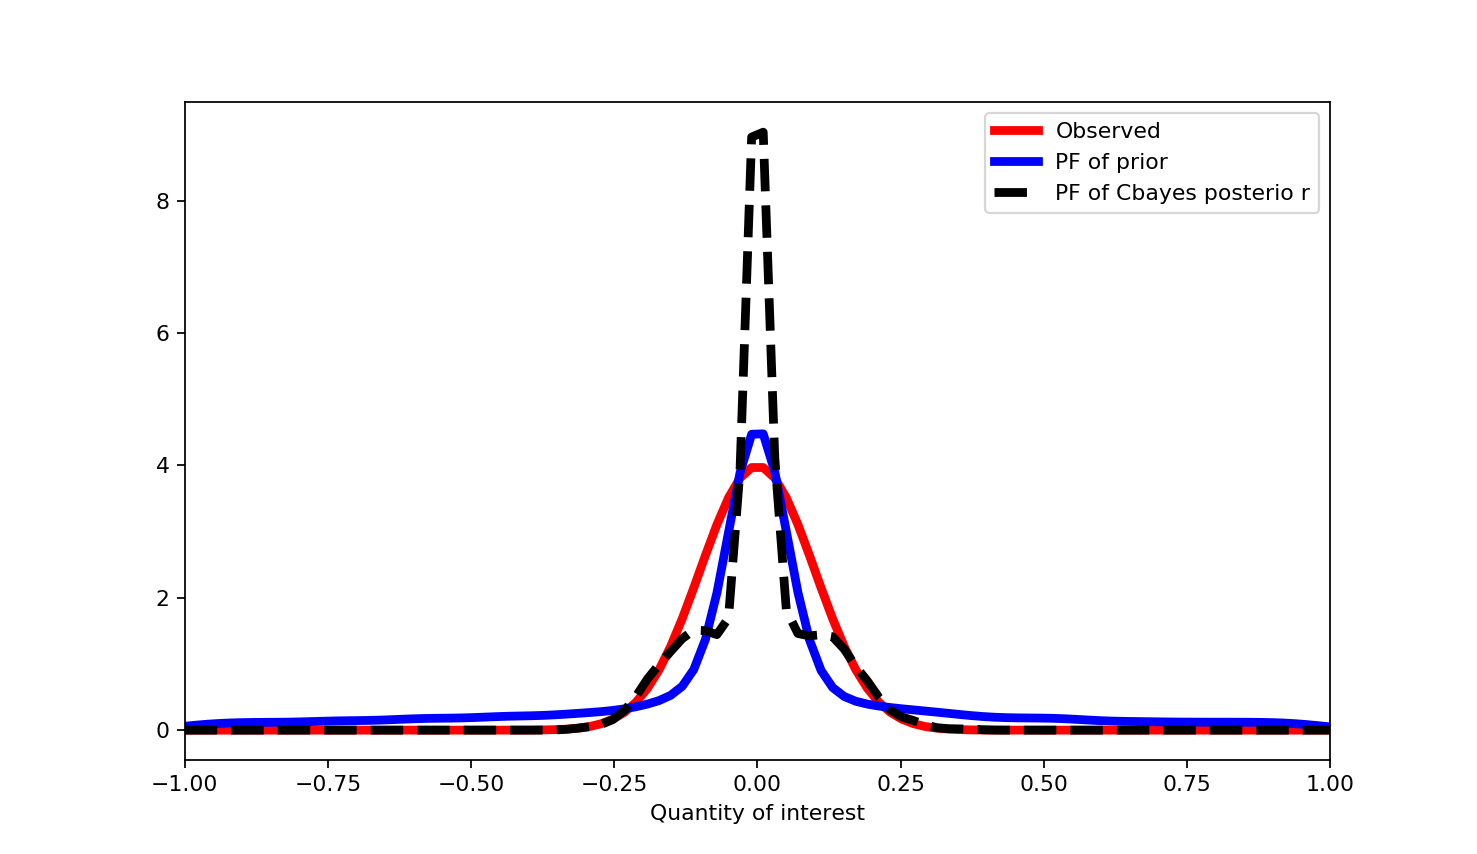

((-1, 1),
 Text(0.5,0,'Quantity of interest'),
 None)

In [16]:
# Compare the observed and the pushforwards of prior and Cbayes posterior
plt.figure()
qplot = np.linspace(-1,1, num=100)
obs_vals_plot = norm.pdf(qplot, loc=0, scale=0.1)
postq_nl_kde = GKDE( post_q_nonlinear_new )

oplot = plt.plot(qplot,obs_vals_plot, 'r-', linewidth=4, label="Observed")
prplot = plt.plot(qplot,q_nonlinear_kde(qplot),'b-', linewidth=4, label="PF of prior")
poplot = plt.plot(qplot,postq_nl_kde(qplot),'k--', linewidth=4, label="PF of Cbayes posterio r")

plt.xlim([-1,1]), plt.xlabel("Quantity of interest"), plt.legend(), plt.show() 

### <center> A simple example in Python: **<font color='purple'>Approximation error in $\pi_\mathcal{D}^{Q(prior)}$</font>**
___

<IPython.core.display.Javascript object>


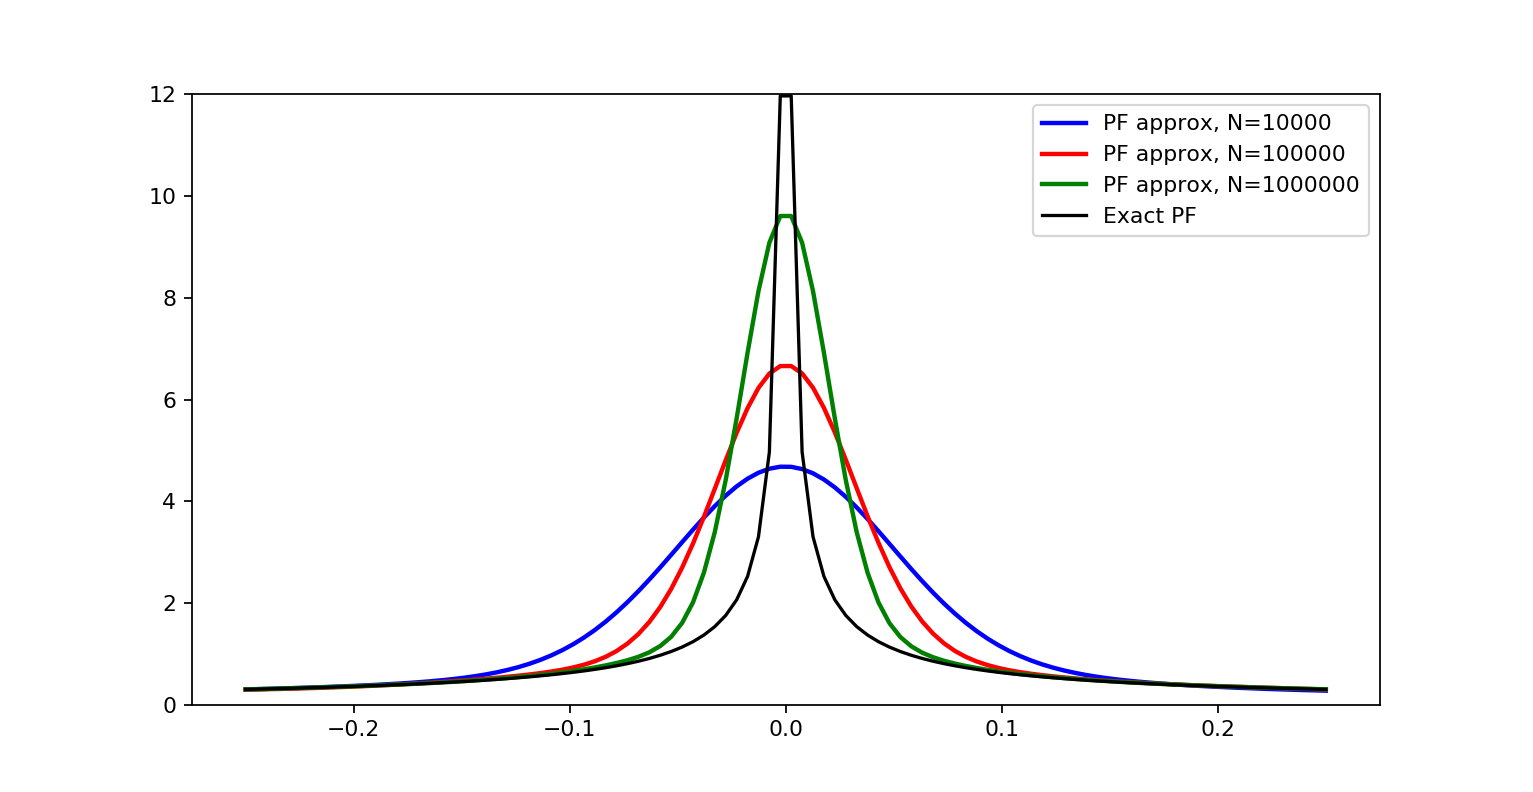

([<matplotlib.lines.Line2D at 0x20dbfb4ab38>],
 (0, 12),
 None)

In [17]:
plt.figure()
qplot = np.linspace(-0.25,0.25, num=100)
Ns = [1E4, 1E5, 1E6] # Compute the pushforward of the prior for different sample sizes
cs = ['b','r','g']
for N,c in zip(Ns,cs):
    lam_loop = np.random.uniform(low=-1,high=1,size=int(N)) 
    qvals_nonlinear_loop = QoI(lam_loop,5)
    q_nonlinear_kde_loop = GKDE( qvals_nonlinear_loop )
    plt.plot(qplot,q_nonlinear_kde_loop(qplot),c, linewidth=2, label="PF approx, N=" + str(int(N)))
plt.plot(qplot, 1/10*np.abs(qplot)**(-4/5),'k',label='Exact PF'), plt.ylim([0,12]), plt.legend(), plt.show()

<a id='Advances'></a>

### <center> Using Approximate Models for a Forward Problem
___
    
The material in the rest of the talk can mostly be found in _[***Convergence of Probability Densities using Approximate Models for Forward and Inverse Problems in Uncertainty Quantification***, T. Butler, J. Jakeman, T. Wildey, arXiv:1807.00375](https://arxiv.org/abs/1807.00375)_

### <center> Some context and a simple example in Python
___

* **<font color='purple'>Goal:</font>** Prove if $Q_n\to Q$ in $L^\infty(\Lambda)$ then $\pi_\Lambda^{Q_n(prior)}\to \pi_\Lambda^{Q(prior)}$. 

What do we have to work with?

* Convergence of r.v.'s $(Q_n)$ in $L^p$ $\Rightarrow$ convergence in probability.

* Convergence in probability $\Rightarrow$ convergence in distribution.

How do we relate convergence in distribution and densities?

* **<font color='purple'>Scheffe's Theorem</font>** states a.e. convergence of densities implies convergence in distribution.

    * Converse of Scheffe's Theorem generally **<font color='red'>false.</font>** 

<IPython.core.display.Javascript object>


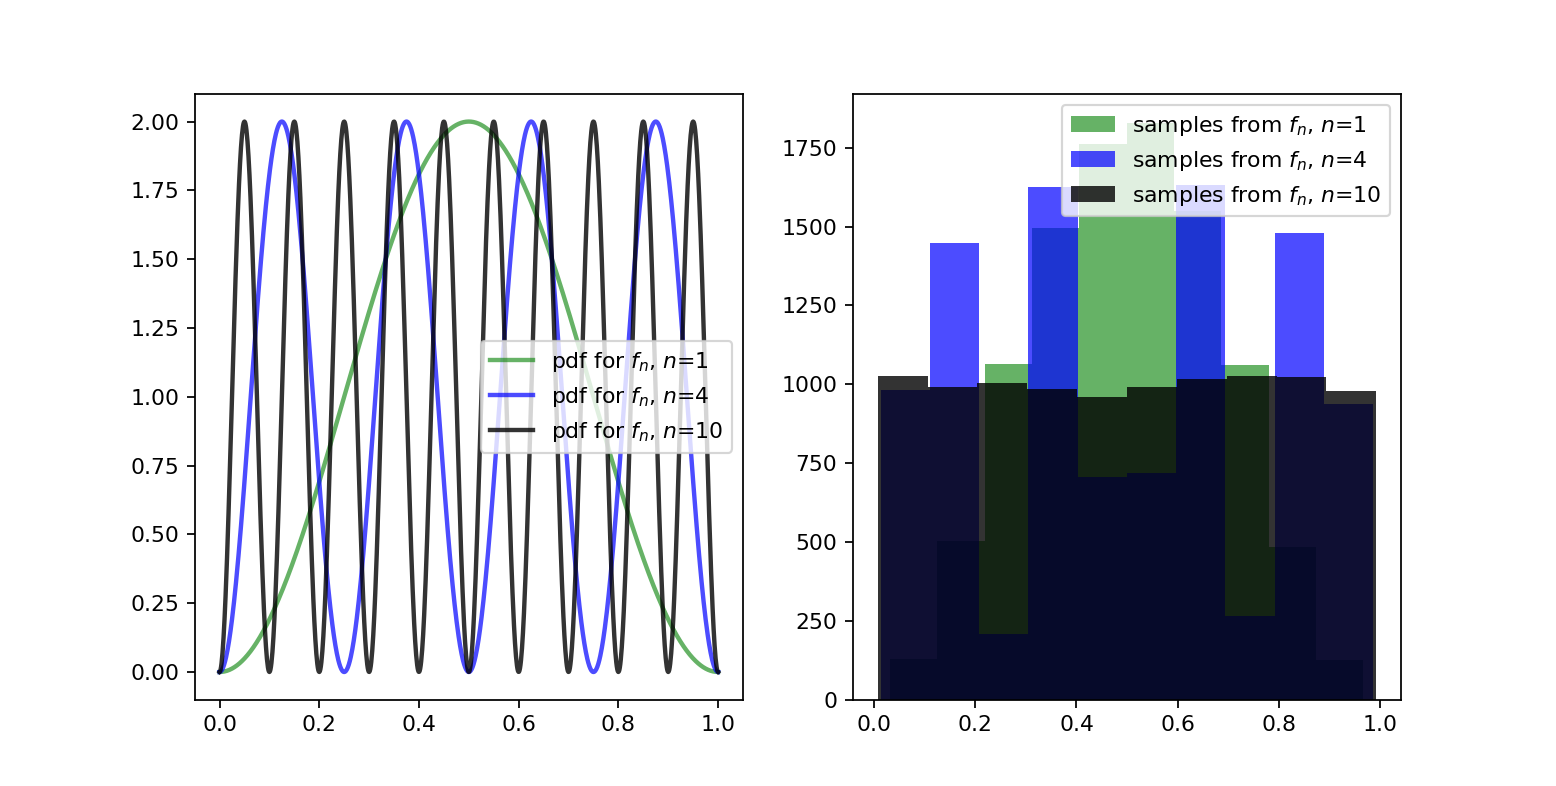

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(<matplotlib.axes._subplots.AxesSubplot at 0x20dbfbdc5f8>,
 <matplotlib.legend.Legend at 0x20dbfd86710>)

In [18]:
# Classical counterexample to converse of Scheffe's Theorem
from scipy.optimize import bisect
plt.figure()
xplot = np.linspace(0,1,num=int(1E3))
N = int(1E4)
ns = [1,4,10]
cs = ['g','b','k']
alphas = [0.6,0.7,0.8]
u = np.random.uniform(low=0,high=1,size=N) 
lam_loop = np.zeros(N)
for n,c,a in zip(ns,cs,alphas):
    def f_n(x): # The pdf
        return (1-np.cos(2*np.pi*n*x))
    plt.subplot(1,2,1), plt.plot(xplot,f_n(xplot), c, linewidth=2, label='pdf for $f_n$, $n$='+str(n),alpha=a)
    for i in range(N): # Sample from r.v. with the pdf
        def F_n(x): # The cdf
            return (x-1/(2*np.pi*n)*np.sin(2*np.pi*n*x)-u[i])
        lam_loop[i] = bisect(F_n,0,1)
    plt.subplot(1,2,2), plt.hist(lam_loop, color=c, label='samples from $f_n$, $n$='+str(n),alpha=a)
plt.subplot(1,2,1), plt.legend(), plt.subplot(1,2,2), plt.legend()

### <center> Converse of Scheffe's Theorem: Continuity and Boundedness conditions
___

Conditions on exact QoI map and push-forward:
* **<font color='blue'>[Boundedness]</font>**  <font color='gray'>$\exists B_1>0$ s.t. $\sup_{q\in\mathcal{D}} \pi_\mathcal{D}^{Q(prior)}(q) \leq B_1$.</font>

* **<font color='blue'>[Continuity]</font>**  <font color='gray'> $\exists A\in\mathcal{B}_{\mathcal{D}}$ s.t. $\mu_\mathcal{D}(A)=0$ and $\pi_\mathcal{D}^{Q(prior)}$ continuous on $\mathcal{D}\backslash A$.</font>

Corresponding conditions using sequence of approximate QoI maps $(Q_n(\lambda))$:
* **<font color='blue'>[Boundedness]</font>** <font color='gray'>$\exists B_2>0$ s.t. $\sup_{q\in\mathcal{D}} \pi_\mathcal{D}^{Q_n(prior)}(q) \leq B_2$.</font>

* **<font color='blue'>[Continuity]</font>** <font color='gray'>$\forall \delta>0$ $\exists N_\delta\in\mathcal{B}_\mathcal{D}$ s.t. $A\subset N_\delta$, $\mu_\mathcal{D}(N_\delta)<\delta$, and $(\pi_{\mathcal{D}}^{Q_n(prior)})$ is a.u.e.c. on $\mathcal{D}\backslash N_\delta$.</font>

### <center> The main convergence theorems
___
    
**<font color='purple'>Theorem 1:</font>** $Q_n\to Q$ in $L^\infty(\Lambda)$ $\Rightarrow$ $\pi_\mathcal{D}^{Q_n(prior)}(q) \to \pi_{\mathcal{D}}^{Q(prior)}(q)$ in $L^\infty(\mathcal{D})$.

**<font color='purple'>Theorem 2:</font>** $Q_n\to Q$ in $L^\infty(\Lambda)$ $\Rightarrow$ $\pi_\mathcal{D}^{Q_n(prior)}(Q_n(\lambda)) \to \pi_{\mathcal{D}}^{Q(prior)}(Q(\lambda))$ in $L^\infty(\Lambda)$.

**<font color='purple'>Theorem 3:</font>** $Q_n\to Q$ in $L^\infty(\Lambda)$ $\Rightarrow$ $\pi_\Lambda^{post,n}(\lambda) \to \pi_\Lambda^{post}(\lambda)$ in $L^1(\Lambda)$.

### <center> Convergence rate theorems


We often approximate densities using a KDE on a finite set of samples.
* Let ***<font color='blue'>sample rate</font>*** denote the rate of convergence of the KDE.
    * This rate is effectively governed by the complexity in evaluating $Q_n$ for a given $n$.
       
    

* Let ***<font color='blue'>approx. model rate</font>*** denote the rate of convergence of $(Q_n)$.

**<font color='purple'>General Convergence Rate Theorem:</font>** ***R.o.C. = sample rate + approx. model rate.***

We are using approx. models in order to generate lots of samples, so

**<font color='purple'>Theorem:</font>** ***Practical R.o.C. = approx. model rate.***

<a id='Numerics'></a>

### <center> Some numerical results
___
    
Will quickly summarize two examples from _[***Convergence of Probability Densities using Approximate Models for Forward and Inverse Problems in Uncertainty Quantification***, T. Butler, J. Jakeman, T. Wildey, arXiv:1807.00375](https://arxiv.org/abs/1807.00375)_

### <center> A Sparse Grid Example
___

* $\Lambda = [0,1]^2$, $\pi_\Lambda^{prior}\sim U(\Lambda)$, $5E+4$ samples used.
	
* $Q(\lambda) =$ weighted sum of Gaussian peaks approximated with sparse grids based on Clenshaw-Curtis points.

**<center><font color='purple'>Left-to-right: Level-4 sparse grid, Level-8 sparse grid, and reference solution</font></center>**
<table border="0">
<tr>
<td> <center> <img src="figures/peaks_cc_sgl4.png"/>  </td>
<td> <center> <img src="figures/peaks_cc_sgl8.png"/> </td>
<td> <center> <img src="figures/peaks_cc_ref.png"/> </td>
</tr>
</table> 


### <center> A Sparse Grid Example: Push-Forward Convergence
___
    
<center><img src="figures/peaks_cc_FWD_error_convergence_SG.png" width=80%/> 

### <center> A Sparse Grid Example: Posterior Convergence ($\pi_\mathcal{D}^{obs} \sim N(2.3, 0.04)$)
___

<center><img src="figures/peaks_cc_INV_error_convergence_SG.png" width=70%/> 

### <center> Discretized PDE Example
___
**<font color='purple'>Model Setup:</font>**  
\begin{equation*}
\begin{cases}
-\nabla \cdot (K(\lambda) \nabla u) = 0, & (x,y)\in\Omega = (0,1)^2,\\
u = 1, & x=0, \\
u = 0, & x=1, \\
K(\lambda)\nabla p \cdot \mathbf{n} = 0, & y=0 \text{ and } y=1.
\end{cases}
\end{equation*}

* $Y = \log{K}$ and $Y(\lambda) = \overline{Y} + \sum_{i=1}^\infty \xi_i(\lambda)\sqrt{\eta_i}f_i(x,y)$.
    * Truncate at 100 terms and $\pi_\Lambda^{prior}\sim N(0,I)$.

**<font color='purple'>Numerical Setup:</font>** 

* Continuous piecewise bilinear FEM on uniform spatial grid.
    * $h=1/10,1/20,1/40,1/80,1/160$.
    
* Use $1E4$ samples from $\pi_\Lambda^{prior}$.

### <center> Discretized PDE Example: Push-Forward Convergence
___

<center><img src="figures/porous_100D_FWD_error_convergence_SD_v2.png" width=80%/> 

### <center> Discretized PDE Example: Posterior Convergence ($\pi_\mathcal{D}^{obs}\sim N(0.7,1E-4)$)
___
   
<center><img src='figures/porous_100D_INV_error_convergence_SD_v2.png' width="70%">

<a id="Conclusions"></a>

### <center> Conclusions
___
    

* The consistent Bayesian posterior is a pullback measure.
    * Is immediately obtained once a push-forward of the prior is obtained.
    * Is stable w.r.t. perturbations in the prior/observed, and is numerically stable.
    * Is fundamentally different than the statistical Bayesian posterior.

* Convergence of push-forwards and posteriors guaranteed for a seq. of approx. models.
    * Requires conditions on continuity and boundedness to hold.
        * Typical type of conditions assumed when applying sparse grids or refinishing meshes.
    * Theoretical/practical rates of convergence follow.
    

### <center> On-going/Future Work
___

* OED/OED4P
* Multi-level/fidelity approaches
* "Density-free" approaches
* Various extensions of the method including
    * parameter identification problems (e.g., using time series data)
    * stochastic QoI Maps
    * infinite dimensional spaces

### <center> Questions?